# 7. Other data
This notebook is the location for the code that transforms 'other' data that is used (i.e outside of the collision data)

```
# -------------------
# Prerequisites:
#    - Download of the data into the data/reference/strategic_roads directory (already a part of the submission zip file )
# 
# Functionality:
#
# (1) Extract the M25 road linestring and reproject into Britisg National Grid Format (EPSG: 27700)
#
# --

## M25 Road 
https://open-data-highwaysengland.hub.arcgis.com/datasets/highwaysengland::network-model-public/explore?layer=1&location=51.521387%2C-0.195265%2C10.44 (accesed 26/03/2025)

In [1]:
import geopandas as gpd

In [7]:
strategic_roads = gpd.read_file('./data/reference/strategic_roads/Link.shp')
strategic_roads.tail(3)

,linkid,linkref,linkcatego,linkdesc,linkform,directiona,direction,numberofla,smartmotor,carriagewa,...,roadname,startdate,enddate,toid,globalid,created_us,created_da,last_edite,last_edi_1,geometry
43772,f4092a9e-e652-2e22-b64d-3f78a10deeb0,A1/E/SL/X/host.played.kings,A,connector at A1 junction with A52,SL,1,E,1,None,X,...,A1,2022-12-19,1899-12-30,None,df54e6d0-8672-42d1-9716-771192b3b40f,esriuk_automation_nh,2025-03-15,esriuk_automation_nh,2025-03-15,"LINESTRING Z (-71864.326 6962745.566 0, -71857..."
43773,14b13733-dc96-9bab-3c08-d0c8efbfdafb,A1/W/SL/X/award.comical.stuff,A,connector at A1 junction with A52,SL,1,W,1,None,X,...,A1,2022-12-19,1899-12-30,None,5797679a-73e5-4110-a952-2676a9efa87b,esriuk_automation_nh,2025-03-15,esriuk_automation_nh,2025-03-15,"LINESTRING Z (-71796.334 6962755 0, -71811.938..."
43774,8049da55-2b7e-0330-afad-27efa56e6fe8,A1/S/SL/M/dust.boxing.wage,A,A1 southbound access,SL,1,S,1,None,M,...,A1,2022-12-19,1899-12-30,None,4109ce5b-e5e3-479c-9a46-135f7cc1f829,esriuk_automation_nh,2025-03-15,esriuk_automation_nh,2025-03-15,"LINESTRING Z (-71703.616 6962775.633 0, -71698..."


In [8]:
strategic_roads.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
strategic_roads = strategic_roads.to_crs(27700)
strategic_roads.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<Axes: >

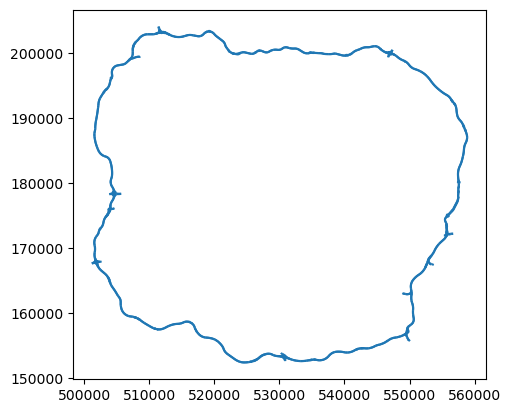

In [10]:
m25 = strategic_roads[(strategic_roads.roadname == "M25") | (strategic_roads.roadname == "A282")]
m25.plot()

In [12]:
m25.to_file('./data/processed/m25/m25.shp')

c:\Users\Boomerang\AppData\Local\ESRI\conda\envs\p312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field startdate create as date field, though DateTime requested.
  ogr_write(
c:\Users\Boomerang\AppData\Local\ESRI\conda\envs\p312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field enddate create as date field, though DateTime requested.
  ogr_write(
c:\Users\Boomerang\AppData\Local\ESRI\conda\envs\p312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field created_da create as date field, though DateTime requested.
  ogr_write(
c:\Users\Boomerang\AppData\Local\ESRI\conda\envs\p312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field last_edi_1 create as date field, though DateTime requested.
  ogr_write(
